In [1]:
import get_data
import numpy as np
import pandas as pd
import regression_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('./insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
inspector = get_data.get('./insurance.csv')
by_row,by_feature = inspector.detect_missing_values()

In [4]:
by_feature

,missing count
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [5]:
outliers = inspector.modified_zScore()
outliers

,age,bmi,children,charges
0,1.124167,0.403409,0.6745,1.008357
1,1.180375,0.543795,0.0000,1.028999
2,0.618292,0.419545,1.3490,0.662917
3,0.337250,1.241693,0.6745,1.693715
4,0.393458,0.245273,0.6745,0.741217
...,...,...,...,...
1333,0.618292,0.091977,1.3490,0.163763
1334,1.180375,0.245273,0.6745,0.964431
1335,1.180375,1.040795,0.6745,1.041863
1336,1.011750,0.742273,0.6745,0.991047


In [6]:
# age outliers
outliers[outliers['age']>=3]

,age,bmi,children,charges


In [7]:
# charges outliers
outliers[outliers['charges']>=3]

,age,bmi,children,charges
14,0.674500,1.892795,0.6745,4.062749
19,0.505875,0.790682,0.6745,3.689896
23,0.281042,0.245273,0.0000,3.806069
29,0.449667,0.952045,0.6745,3.941691
30,0.955542,0.839091,0.6745,3.521647
...,...,...,...,...
1301,1.292792,0.076648,1.3490,5.017820
1303,0.224833,0.419545,0.6745,3.823251
1308,0.786917,0.032273,0.6745,3.295200
1313,1.124167,0.693864,0.6745,3.630776


In [8]:
# data.drop(outliers[outliers['charges']>=3].index,axis=0,inplace=True)

In [9]:
# children outliers
outliers[outliers['children']>=3]

,age,bmi,children,charges


In [10]:
# bmi outliers
outliers[outliers['bmi']>=3]

,age,bmi,children,charges
116,1.067958,3.011045,0.6745,0.268697
847,0.899333,3.224045,0.0000,0.933242
1047,0.955542,3.579045,0.0000,4.719896
1317,1.180375,3.667795,0.6745,1.104542


In [11]:
# data cleaning 1 for make more accuracy without outliers - ignore outliers (fail)

# data.drop([116,847,1317],axis=0,inplace=True)
# data

In [12]:
target = data['charges']
data = data.drop(labels='charges',axis=1)

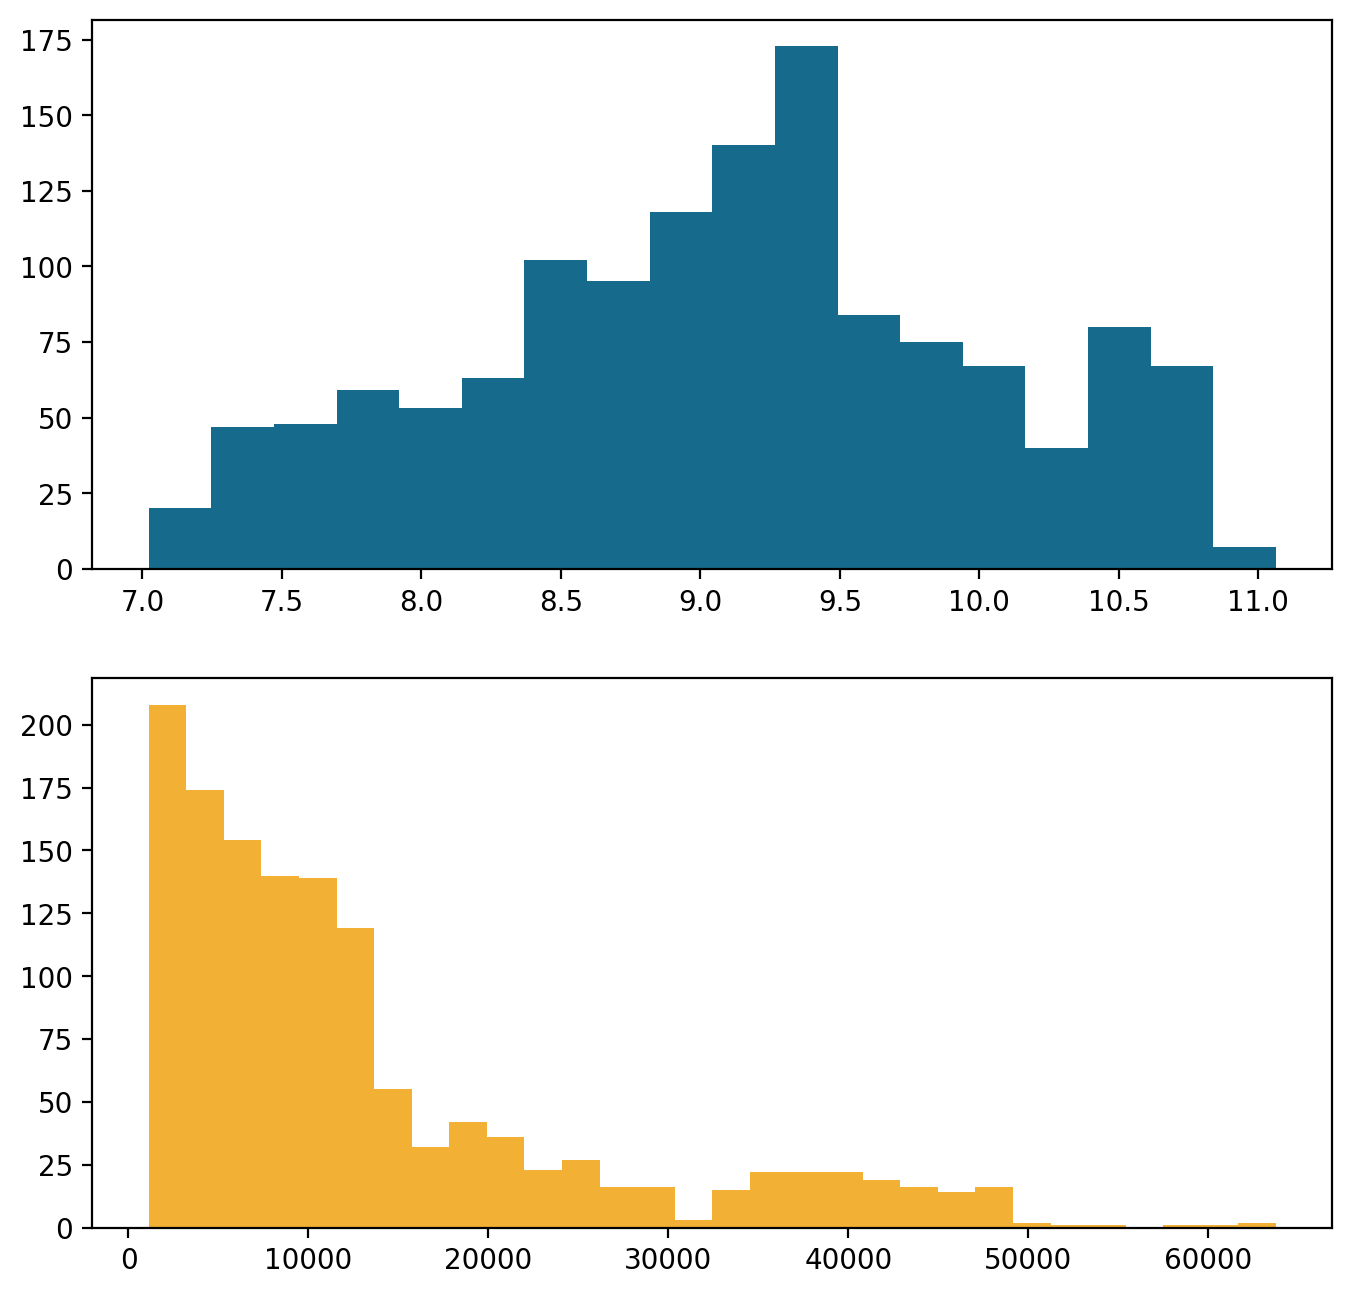

In [13]:
# data clean 2 - transform outliers
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[8,8],dpi=200)
axs = axes.ravel()
axs[0].hist(np.log(target),bins='auto',color='#166B8C')
axs[1].hist(target,bins='auto',color='#F2B035')
plt.show()

In [33]:
target = np.log(target)

In [14]:
numeric_data = data.select_dtypes(include=np.number)
numeric_data

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


In [15]:
vfi = pd.DataFrame()
vfi['features'] = numeric_data.columns
vfi['VFI'] = [variance_inflation_factor(numeric_data.values,i) for i in range(numeric_data.shape[1])]
vfi.sort_values(by='VFI')

,features,VFI
2,children,1.796637
0,age,7.536550
1,bmi,7.846515


In [16]:
full = pd.get_dummies(data)
full.ndim

2

In [17]:
np.ones(full.shape[0]).reshape(-1,1)

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [18]:
full = np.hstack([full,np.ones(full.shape[0]).reshape(-1,1)])
full.shape

(1338, 12)

In [34]:
train_x,test_x,train_y,test_y = train_test_split(full,target,test_size=0.2,random_state=42)
train_x.shape,train_y.shape,test_x.shape,test_y.shape

((1070, 12), (1070,), (268, 12), (268,))

In [35]:
weights = regression_model.regression(train_x,train_y)
weights

array([0.03424547, 0.01359981, 0.09244785, 1.74966363, 1.67531379,
       0.93663972, 2.4883377 , 0.93500422, 0.87859035, 0.79893602,
       0.81244683, 3.42497742])

In [36]:
predict_1 = np.dot(test_x,weights)
predict_1

array([ 9.11460197,  8.63097424, 11.09890997,  9.11828346,  9.55198904,
        8.68960332,  7.94673471,  9.62273203,  8.24029881,  9.2610713 ,
       10.03761867,  8.92049933,  8.39820157, 10.81615193, 10.99879723,
       10.71157421,  9.35358029, 10.66206064,  8.95943084, 10.37975511,
        8.49278914,  8.95018237,  7.91347583,  8.34102567,  9.36191472,
        9.33998206,  9.45580902,  8.60527649,  9.20247264,  7.86218361,
        9.06181214,  9.37467675,  8.10359695,  8.56589491,  8.24020204,
        9.05432162,  8.09436523,  8.89536488, 10.74294471, 10.19156291,
        8.42558526,  8.18772342,  9.42079485,  9.28225507,  8.63705627,
        9.33630301,  8.35128321,  8.38768321, 10.62664875,  8.60446882,
        9.56135439,  7.9441596 ,  9.01544178,  7.94364858,  9.22185462,
        9.30579414,  8.34555034, 10.27386974,  9.36011846,  9.31348848,
        9.51366606,  8.70890029,  9.70664799,  8.95286772,  9.24694347,
        8.39390312,  9.83953705,  9.25300983,  8.24465537,  8.13

In [37]:
r2_score(test_y,predict_1)*100, mean_squared_error(test_y,predict_1)

(80.47311493462988, 0.17557416396791647)

In [ ]:
weights_gd,cost_history = regression_model.fit(np.sqrt(train_x),np.sqrt(train_y),0.00001,1000001)
weights_gd

In [39]:
weights_ridge = regression_model.ridge_fit(np.sqrt(train_x),
                                           np.sqrt(train_y),
                                           0.001,
                                           0.05,
                                           100001)
weights_ridge

array([0.0731566 , 0.03840531, 0.02552144, 0.54164696, 0.52822748,
       0.40834484, 0.6615296 , 0.28370722, 0.2723724 , 0.25432638,
       0.25946844, 1.06987444])

In [26]:
# optimize alpha
alpha = np.arange(0,1,0.01)
alpha_hist = []

for i in range(alpha.shape[0]):
    w = regression_model.ridge_fit(np.sqrt(train_x),
                                   np.sqrt(train_y),
                                   0.01,
                                   alpha[i],
                                   10001)
    alpha_hist.append(w)

alpha_hist

KeyboardInterrupt: 

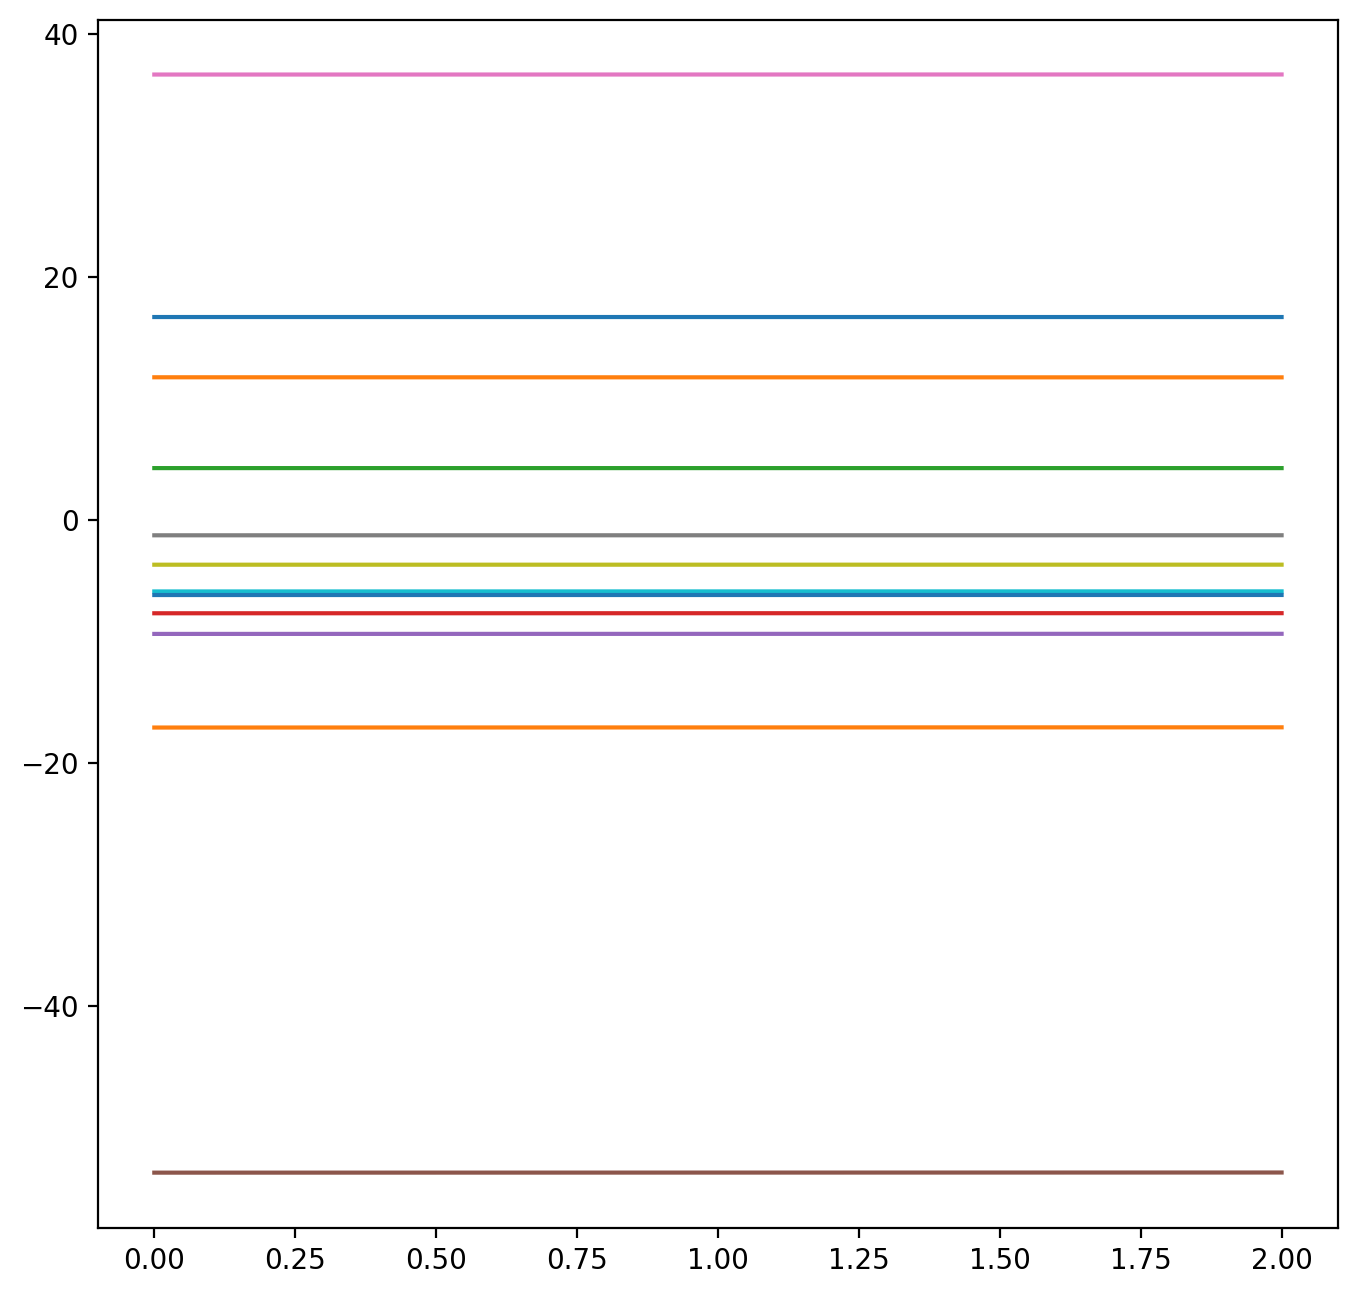

In [40]:
alpha_hist = np.asarray(alpha_hist)

fig = plt.figure(figsize=[8,8],dpi=200)
ax = fig.add_subplot(111)
ax.plot(alpha_hist)
plt.show()

In [47]:
predict_2 = np.dot(np.sqrt(test_x),weights_gd)
predict_2

array([2.95472872, 2.93059601, 3.30964942, 2.9507047 , 2.99589734,
       3.23738759, 2.49236494, 3.37986731, 2.4473645 , 3.06835164,
       2.93238552, 3.03833323, 2.78789002, 3.54517653, 3.5590269 ,
       3.45544939, 3.35501784, 3.39345035, 2.91374838, 3.13204805,
       2.64996882, 3.07303266, 2.68284073, 3.06545813, 3.07489351,
       3.20207158, 3.24705047, 2.9118858 , 3.01794391, 2.60850683,
       2.98727757, 3.17362992, 2.79891476, 2.60958644, 2.80216492,
       3.29888036, 2.64446307, 2.99377727, 3.16464844, 3.23471796,
       2.73376717, 2.83291063, 3.2735424 , 2.98316803, 3.00724707,
       3.04503656, 2.91552632, 2.6579583 , 3.35333262, 3.05524888,
       3.25049446, 2.62571084, 3.31831979, 2.60991327, 3.12901633,
       3.19325626, 2.7408436 , 3.28288343, 3.17591593, 3.20962714,
       3.17877917, 3.17834846, 3.33606334, 2.89160905, 3.13364172,
       2.75895352, 2.87472545, 2.92987759, 2.61120829, 2.97182075,
       3.20033539, 3.17809285, 3.04526783, 2.9748078 , 3.16130

In [48]:
r2_score(np.sqrt(test_y),predict_2)*100, mean_squared_error(np.sqrt(test_y),predict_2)

(-43.15109335099334, 0.0357607493886834)

In [43]:
predict_3 = np.dot(np.sqrt(test_x),weights_ridge)
predict_3

array([3.02311311, 2.94160292, 3.32981062, 3.01406255, 3.06786767,
       2.96955672, 2.79335399, 3.10052209, 2.85037589, 3.04083035,
       3.15370784, 2.9957557 , 2.90258661, 3.30426431, 3.32630044,
       3.29124358, 3.07328324, 3.28687461, 2.99928944, 3.22427773,
       2.87652033, 3.00100842, 2.79654971, 2.88901209, 3.05739518,
       3.06071193, 3.07353652, 2.92832821, 3.03927874, 2.78199513,
       3.00094646, 3.06121726, 2.83622483, 2.90867723, 2.87481813,
       3.02320712, 2.83743185, 2.99457971, 3.28714031, 3.20627608,
       2.86067223, 2.86251093, 3.08210088, 3.03453082, 2.94674895,
       3.0547623 , 2.88629478, 2.87864122, 3.26821808, 2.94214265,
       3.08624515, 2.80480587, 3.02761339, 2.79683077, 3.03357817,
       3.06116837, 2.88463434, 3.20874729, 3.0574345 , 3.05761739,
       3.07657047, 2.96317223, 3.11224264, 2.99440932, 3.0445134 ,
       2.90045293, 3.10008487, 3.02984738, 2.8657762 , 2.85042372,
       3.00041118, 3.05410769, 3.00275851, 2.97213309, 3.00849

In [44]:
r2_score(np.sqrt(test_y),predict_3)*100, mean_squared_error(np.sqrt(test_y),predict_3)

(80.23974307848287, 0.004936333904860581)

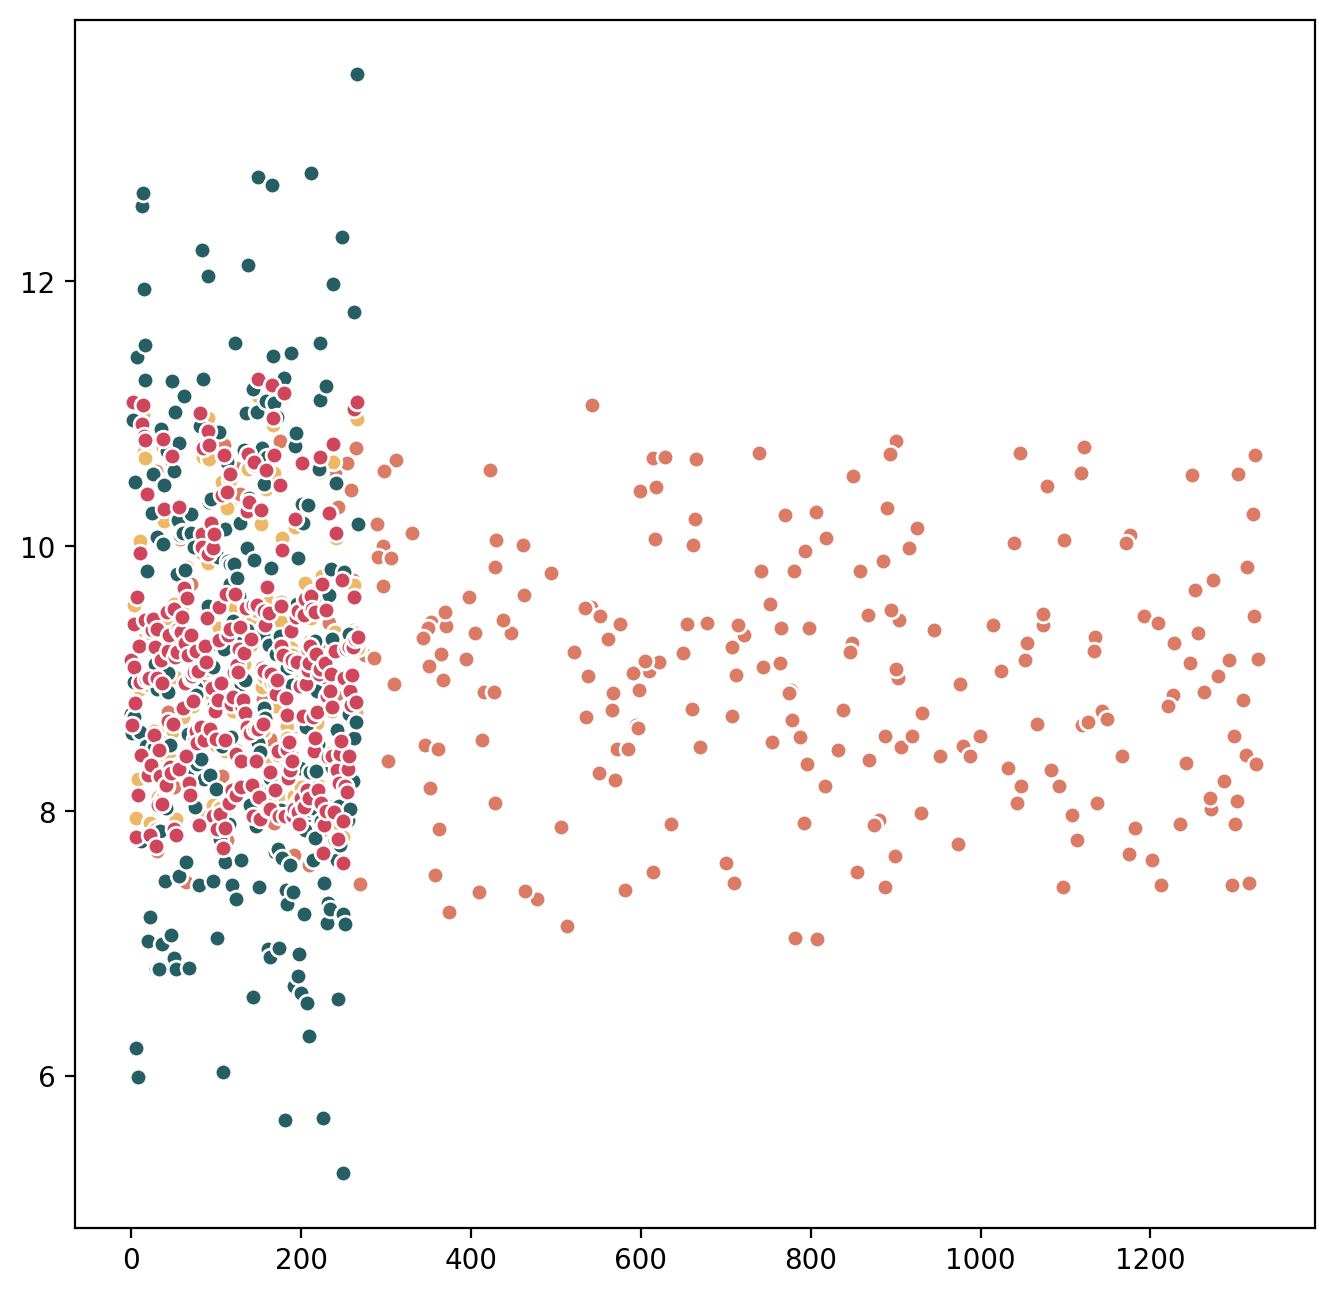

In [45]:
plt.figure(figsize=[8,8],dpi=200)
plt.plot(test_y,'o',color='#DB7B65',markeredgecolor='w')
plt.plot(predict_1,'o',color='#ECB865',markeredgecolor='w')
plt.plot(np.square(predict_2),'o',color='#255E63',markeredgecolor='w')
plt.plot(np.square(predict_3),'o',color='#CF455C',markeredgecolor='w')
plt.show()

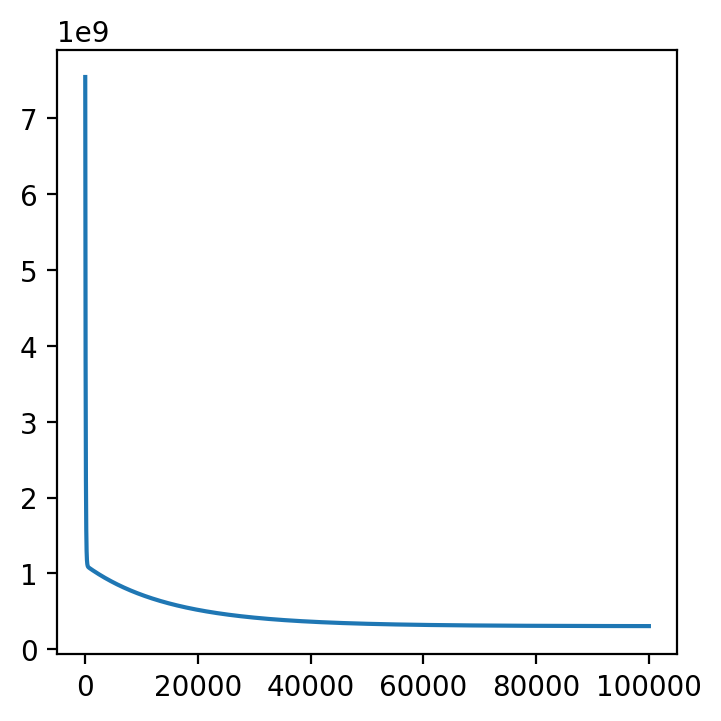

In [32]:
plt.figure(figsize=[4,4],dpi=200)
plt.plot(cost_history)
plt.show()

In [49]:
test_y

764      9.115488
887      8.570198
890     10.286400
1293     9.137973
259     10.426744
          ...    
109     10.759084
575      9.411066
535      8.710640
543     11.063045
846      9.197529
Name: charges, Length: 268, dtype: float64